In [1]:
from sklearn.feature_extraction.text import CountVectorizer, ENGLISH_STOP_WORDS
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.stem import PorterStemmer
from nltk.tokenize import sent_tokenize, word_tokenize
import numpy as np
import nltk
import re
nltk.download('punkt')
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.stem.snowball import SnowballStemmer
from unidecode import unidecode
import matplotlib.pyplot as plt
from scipy.sparse.linalg import svds

with open('data.txt', 'r') as file:
    # Read the entire contents of the file
    # Read lines from the file and remove leading/trailing whitespaces
    lines = [line.strip() for line in file.readlines()]

# Filter out empty lines
non_empty_lines = [line for line in lines if line]
#print(non_empty_lines.shape)
array_of_sentences = np.array(non_empty_lines)
# Contains 192 sentences
array_of_sentences.shape

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Lycko\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Lycko\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


(192,)

In [2]:
# document preprocessing

stop_words = set(stopwords.words('english')) # Does not contain same stop words as in the book, may effect result.
#stop_words.update(set(str(i) for i in range(10)))  # Add digits to the set of stop words
#print(stop_words)
# Add stopwords manually
#stop_words.extend(['2000', '11','2', '13', '4','5', '6', '17','8', '19']) #TODO fixa så nummer inte kmr med, se till a göra toString innan?
#print(stop_words)

stemmer = SnowballStemmer("english", ignore_stopwords=True)

# Store final preprocessed data set in 'corpus'
corpus = [] 

for sentence in array_of_sentences:

    # Remove non-alphabetic characters and numbers
    sentence = re.sub(r'[^a-zA-Z\s]', '', sentence)

    # Tokenize the sentence into words
    words = sentence.split()

    # Remove stopwords and apply stemming to each word
    processed_words = [stemmer.stem(word) for word in words if word.lower() not in stop_words]

    # Join the processed words to form the processed sentence
    processed_sentence = ' '.join(processed_words)

    # Append the processed sentence to the list
    corpus.append(processed_sentence)

# Convert the processed list to a NumPy array
array_corpus = np.array(corpus)

# 'array_corpus' is a NumPy array containing processed sentences
print(array_corpus.shape)

(192,)


In [40]:
# Initialize the TfidfVectorizer with appropriate options
vectorizer = TfidfVectorizer()

# Fit and transform the processed sentences to obtain the sparse TF-IDF matrix (This is our matrix A)
tfidf_matrix = vectorizer.fit_transform(array_corpus).T

print(tfidf_matrix.shape)

# Convert the TF-IDF matrix to a dense NumPy array (notcused)
dense_tfidf_matrix = tfidf_matrix.toarray()


(486, 192)


In [47]:


# perform SVD on the sparse matrix A (tfidf_matrix)
# k denotes the number of singular values and singular vectors to compute.
k = 1
u, s, v = svds(tfidf_matrix, k) 
u = abs(u) 
v = abs(v)

print(u.shape)
print(v.shape)

# Extract the most important sentences and terms
most_important_terms_indices = np.argsort(u[:, 0])[::-1][0 : 5] #[::-1] = reversing the list
most_important_sentences_indices = np.argsort(v[0, :])[::-1][0 : 5] #[::-1] = reversing the list

# Get the actual sentences and terms
most_important_sentences = [array_of_sentences[i] for i in most_important_sentences_indices]
most_important_terms = [vectorizer.get_feature_names()[i] for i in most_important_terms_indices]


print("\nTop k most important terms:")
for term in most_important_terms:
    print(term)
print("\n")
# Print the results
print("Top k most important sentences:")
for sentence in most_important_sentences:
    print(sentence)





(486, 1)
(1, 192)

Top k most important terms:
eigenvalu
matrix
eigenvector
page
vector


Top k most important sentences:
We compute the eigenvalues and eigenvectors of the matrix with from and.
The column-stochastic matrix defined in is irreducible (since A > 0) and has the dominant eigenvalue. The corresponding eigenvector satisfies.
Assume that the eigenvalues of the column-stochastic matrix are.
Then the eigenvalues of are.
We now see that the pagerank vector for the matrix is well defined.


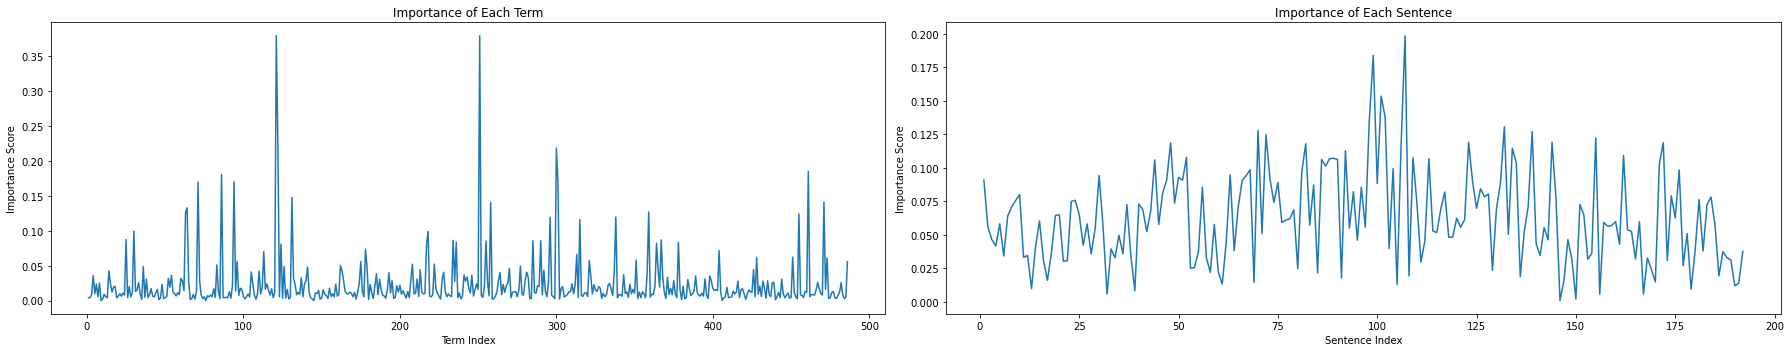

In [14]:


# Plot the importance of each term
plt.figure(figsize=(25, 5))
plt.subplot(1, 2, 1)
plt.plot(range(1, len(u[:, 0]) + 1), np.abs(u[:, 0]))
plt.title('Importance of Each Term')
plt.xlabel('Term Index')
plt.ylabel('Importance Score')

# Plot the importance of each sentence
plt.subplot(1, 2, 2)
plt.plot(range(1, len(v[0, :]) + 1), np.abs(v[0, :]))
plt.title('Importance of Each Sentence')
plt.xlabel('Sentence Index')
plt.ylabel('Importance Score')

plt.tight_layout()
plt.show()

In [61]:
#Rank k using QR decomposition with column pivoting
import numpy as np
from scipy.linalg import qr

k = 10

# Assuming D is your TF-IDF matrix
D = dense_tfidf_matrix  # Replace with your actual TF-IDF matrix

# QR decomposition with column pivoting
Q, R, P = qr(D, mode='economic', pivoting=True)
#print(Q)
#print(RS)
#print(P)

# Compute the indices of the first k columns of AP
n = D.shape[1]
#print(n)
p = np.arange(1, n + 1) @ np.eye(n)[:, P]
pk = p[:k].astype(int)
#print(pk)
# Extract the top-k columns from the original matrix D
C_times_D = D[:, pk - 1]  # Python indexing is 0-based
# C_times_D is a rank-k approximation of A

# Extract the most important sentences
most_important_sentences = [array_of_sentences[i - 1] for i in pk]

# Print the results
print("Top k most important sentences:")
for sentence in most_important_sentences:
    print(sentence)


Top k most important sentences:
A few such examples are given at the end of this chapter.
There are a few problems with such an iteration: if a page has no outlinks, then in the iteration process it accumulates rank only via its inlinks, but this rank is never distributed further.
Random Walk and Markov Chains
By dominant eigenvalue we mean the largest eigenvalue in magnitude, which we denote.
We now see that the pagerank vector for the matrix is well defined.
A Google search with the same search phrase made on February 6, 2019, gave the top result University - Wikipedia, which is a good answer for the highly underspecified search phrase.
Therefore the model is modified so that zero columns are replaced with a constant value in all positions.
There is a unique corresponding eigenvector satisfying, and, this is the only eigenvector that is nonnegative.
The statement now follows immediately.
The only viable method so far is the power method.
